In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
def data_load(file='wavetronixdata.csv'):
    data = pd.read_csv('wavetronixdata.csv')
    data['time'] = data.apply (lambda row: row['hour']*12+row['min5'],axis=1)
    return data

df = data_load()

In [111]:
def sensor_data_selector(sensorID, data = df):
    sensor = np.unique(list(df['sensor']))[sensorID]
    sensordata = data[data['sensor']==sensor]
    time = np.int32(sensordata['time'])
    speed = np.float32(sensordata['speed'])
    count = np.float32(sensordata['count'])
    occup = np.float32(sensordata['occup'])
    return sensor,time,speed,count,occup

In [122]:
sensor,time,speed,count,occup = sensor_data_selector(6)

In [133]:

num_bins = 20
counts, bin_edges = np.histogram(speed, bins=num_bins)
cdf = np.cumsum(counts/np.sum(counts))

In [134]:
cdf

array([ 0.0046729 ,  0.00934579,  0.00934579,  0.01401869,  0.01401869,
        0.03271028,  0.06074766,  0.10280374,  0.11682243,  0.14953271,
        0.1728972 ,  0.20093458,  0.25700935,  0.3411215 ,  0.46261682,
        0.63551402,  0.80373832,  0.93457944,  0.99065421,  1.        ])

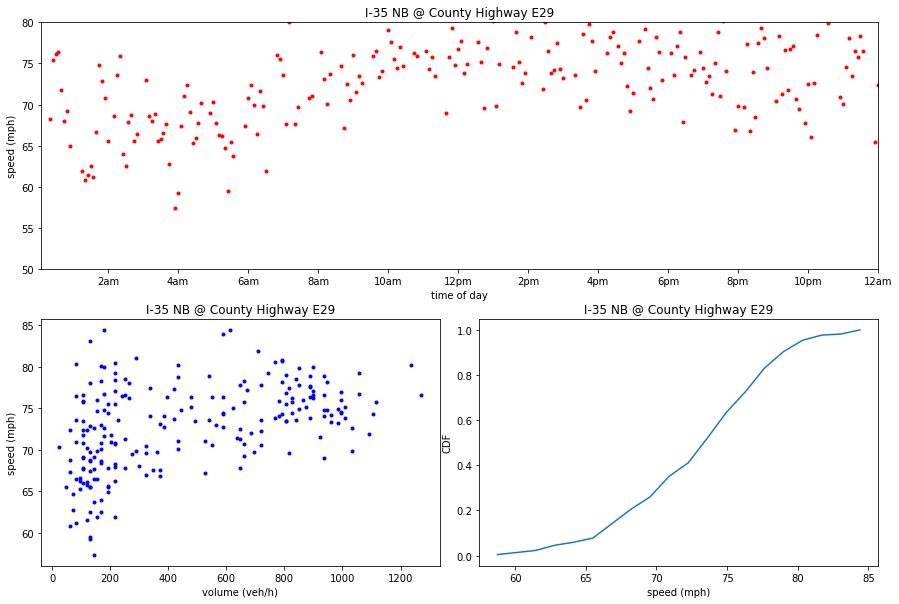

In [142]:
from ipywidgets import interact, interactive, fixed
from matplotlib import gridspec
@interact
def speed_visual(i:(0,14)=0):
    
    sensor,time,speed,count,occup = sensor_data_selector(i)

    fig = plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.2)
    ax0 = plt.subplot(gs[0,:])
    ax0.plot(time,speed,'r.')
    ax0.set_title(sensor)
    ax0.set_xlim([0,287])
    ax0.set_ylim([50,80])
    xt = np.asarray([24,48,72,96,120,144,168,192,216,240,264,288])-1
    ax0.set_xticks(list(xt))
    ax0.set_xticklabels(['2am','4am','6am','8am','10am','12pm','2pm','4pm','6pm','8pm','10pm','12am'])
    ax0.set_xlabel('time of day')
    ax0.set_ylabel('speed (mph)')
    
    ax1 = plt.subplot(gs[1,0])
    ax1.plot(count*12,speed,'b.')
    ax1.set_title(sensor)
    ax1.set_xlabel('volume (veh/h)')
    ax1.set_ylabel('speed (mph)')
    
    
    num_bins = 20
    counts, bin_edges = np.histogram(speed, bins=num_bins)
    cdf = np.cumsum(counts/np.sum(counts))
    
    ax2 = plt.subplot(gs[1,1])
    plt.plot(bin_edges[1:], cdf)
    ax2.set_title(sensor)
    ax2.set_xlabel('speed (mph)')
    ax2.set_ylabel('CDF')
    fig.savefig('output/sensor.png')

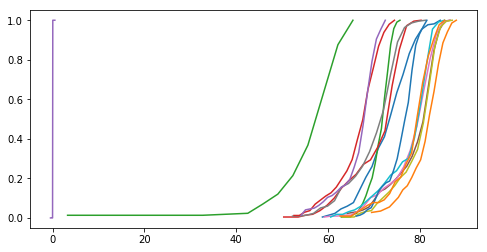

In [141]:
fig = plt.figure(figsize=(8,4))
for i in range(15):
    sensor,time,speed,count,occup = sensor_data_selector(i)
    
    num_bins = 20
    counts, bin_edges = np.histogram(speed, bins=num_bins)
    cdf = np.cumsum(counts/np.sum(counts))
    plt.plot(bin_edges[1:], cdf)
fig.savefig('output/CDFs.png')

In [48]:
df 

,sensor,date,hour,min5,speed,count,occup,direction,group,time
0,I-35 NB @ IA 210,12/31/16,0,1,51.132812,16,0.466667,1,1t,1
1,I-35 NB @ IA 210,12/31/16,0,0,0.000000,0,0.000000,1,1t,0
2,I-35 NB @ IA 210,12/31/16,23,9,60.551470,17,0.733333,1,1t,285
3,I-35 NB @ IA 210,12/31/16,23,8,47.123016,21,0.600000,1,1t,284
4,I-35 NB @ IA 210,12/31/16,23,7,35.848213,28,0.933333,1,1t,283
5,I-35 NB @ IA 210,12/31/16,23,6,42.713070,22,0.600000,1,1t,282
6,I-35 NB @ IA 210,12/31/16,23,5,47.688490,21,0.600000,1,1t,281
7,I-35 NB @ IA 210,12/31/16,23,4,49.062500,20,0.600000,1,1t,280
8,I-35 NB @ IA 210,12/31/16,23,3,36.058468,31,1.000000,1,1t,279
9,I-35 NB @ IA 210,12/31/16,23,2,43.598484,11,0.333333,1,1t,278
